## 練習時間
將你的結果存成 csv, 上傳你的第一份 Kaggle 成績

Hints: https://stackoverflow.com/questions/16923281/pandas-writing-dataframe-to-csv-file

# [作業目標]
- 檢視並重新執行腳本, 試著將執行結果存檔並提交到 Kaggle 上

# [作業重點]
- 執行後, 將所得結果, 存成可以提交的 csv 檔 (In[10]) (Hint : 使用 pandas.DataFreame.to_csv)

# [提醒]
- 執行後, 將所得結果, 存成可以提交的 csv 檔 (In[10]) (Hint : 使用 pandas.DataFreame.to_csv)

In [73]:
# 載入需要的套件
import os
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### 仿造之前做過的處理

In [74]:
# 設定 data_path
dir_data = '../Part01/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

# 讀取檔案
app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

In [75]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

### 做好前處理
開始擬合模型之前，我們要確保 training & testing data 的欄位數量一致，原因是因為 One hot encoding 會製造多的欄位，有些類別出現在 training data 而沒有出現 testing data 中，我們就要把這些多餘的欄位去除

In [76]:
for i in app_train.columns:
    if app_train[i].dtype != 'object':
        if app_train[i].isnull().sum() != 0:
            app_train[i].fillna(app_train[i].median(), inplace=True)
    else:
        if app_train[i].isnull().sum() != 0:
            app_train[i].fillna(app_train[i].mode()[0], inplace=True)

In [77]:
x_train = app_train.loc[:,app_train.columns != 'TARGET']
y_train = app_train['TARGET']

In [78]:
x_test = app_test.copy()
for i in x_test.columns:
    if x_test[i].dtype != 'object':
        if x_test[i].isnull().sum() != 0:
            x_test[i].fillna(x_test[i].median(), inplace=True)
    else:
        if x_test[i].isnull().sum() != 0:
            x_test[i].fillna(x_test[i].mode()[0], inplace=True)

In [86]:
x_data = pd.concat([x_train, x_test], axis=0)

In [87]:
x_data.shape

(356255, 122)

In [91]:
x_train.shape

(307511, 122)

In [90]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in x_train.columns:    
    x_data[i] = le.fit_transform(x_data[i])

In [97]:
x_train_modified = x_data.iloc[:307511,:]
x_test_modified = x_data.iloc[307511:,:]

### Fit the model

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# 設定模型與模型參數
RFC = RandomForestClassifier(random_state=1, n_estimators=10)
RFC = RFC.fit(x_train_modified, y_train)
score = cross_val_score(RFC, x_train_modified, y_train, cv=5).mean()
print(score)

0.9180647214726045


In [111]:
RF_pred = RFC.predict_proba(x_test_modified)[:, 1]

In [112]:
RF_pred

array([0.1, 0. , 0. , ..., 0. , 0.1, 0.3])

### 儲存預測結果

In [113]:
# 計算提交結果
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = RF_pred

submit.head()

C:\Users\Karma\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SK_ID_CURR,TARGET
0,100001,0.1
1,100005,0.0
2,100013,0.0
3,100028,0.0
4,100038,0.0


In [114]:
submit.to_csv('submit_RF.csv', index=False)

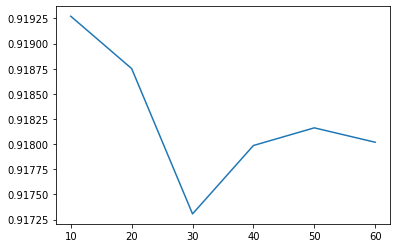

In [116]:
score_all =[]
for i in range(10, 61, 10):
    RFC = RandomForestClassifier(random_state=1, n_estimators=10, max_depth=i)
    RFC = RFC.fit(x_train_modified, y_train)
    score = cross_val_score(RFC, x_train_modified, y_train, cv=5).mean()
    score_all.append(score)
plt.plot(range(10, 61, 10), score_all)

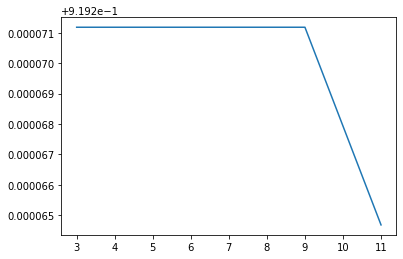

In [118]:
score_all =[]
for i in range(3, 12, 2):
    RFC = RandomForestClassifier(random_state=1, n_estimators=10, max_depth=i)
    RFC = RFC.fit(x_train_modified, y_train)
    score = cross_val_score(RFC, x_train_modified, y_train, cv=5).mean()
    score_all.append(score)
plt.plot(range(3, 12, 2), score_all)

In [122]:
RFC = RandomForestClassifier(random_state=1, n_estimators=100, max_depth=5)
RFC = RFC.fit(x_train_modified, y_train)
RF_pred = RFC.predict_proba(x_test_modified)[:, 1]

In [124]:
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = RF_pred

submit.head()

C:\Users\Karma\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,SK_ID_CURR,TARGET
0,100001,0.091620
1,100005,0.096995
2,100013,0.054857
3,100028,0.050666
4,100038,0.093057


In [125]:
submit.to_csv('submit_RF2.csv', index=False)